### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [17]:
%matplotlib inline 

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [18]:
df = pd.read_csv('vehicle.csv')

In [19]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [20]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
df1 = df.dropna()

In [22]:
df1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

As per the request, we read the data set and drop the nul values.

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

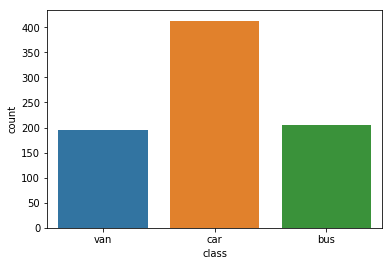

In [23]:
sns.countplot(x='class',data=df1)

### Check for any missing values in the data 

In [24]:
df1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### As per the above output there is no missing values in the using data set df1.

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [25]:
from scipy.stats import zscore
df2 = df1.drop(labels= "class", axis = 1)
df2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [26]:
df3 = df2.apply(zscore)
df3.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [31]:
cluster_errors = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [32]:
cluster_range = range(1,10)   
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df3)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5741.223045
4,5,5189.455243
5,6,4707.810964
6,7,4355.019229
7,8,4086.452002
8,9,3867.484739


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

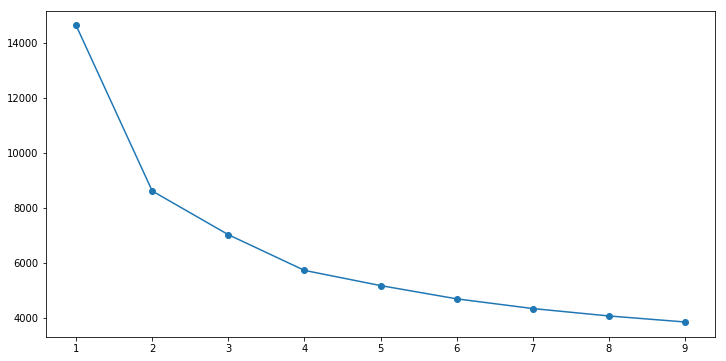

In [33]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### The elbow plot confirms our visual analysis that there are likely 3 good clusters
Let us start with 3 clusters

### Find out the optimal value of K

From the above chat we noticed that from 1 to 3 it is changed drastically. But after 3 the curve becomes smooth. So we concluded that we are going to find 3 clusteres. So the optimal K value is 3.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [34]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [35]:
centroids = cluster.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

In [37]:
centroid_df = pd.DataFrame(centroids, columns = df2.columns )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


### Use kmeans.labels_ function to print out the labels of the classes

In [46]:
df['labels'] = pd.DataFrame(cluster.labels_ , columns=list(['labels']))

In [47]:
pd.value_counts(df['labels'])

0.0    313
1.0    260
2.0    240
Name: labels, dtype: int64

In [122]:
cluster.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [48]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [85]:
df_6 = np.concatenate([a, b, c])

In [86]:
df_7 = pd.DataFrame(df_6)

In [88]:
df_7.shape

(250, 2)

In [89]:
df_7.head()

,0,1
0,9.488213,1.315788
1,9.481068,1.714388
2,10.768817,4.829118
3,11.322867,3.143748
4,11.521237,2.585355


### 10. Use scatter matrix to print all the 3 distributions

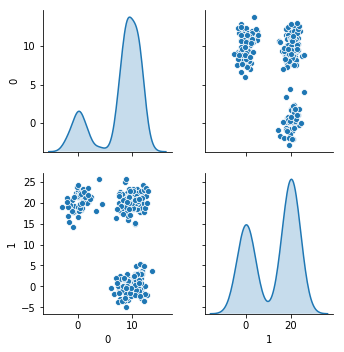

In [90]:
sns.pairplot(df_7, diag_kind ='kde')

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [136]:
Z = linkage(df_7, method='ward', metric='euclidean')
Z

array([[8.10000000e+01, 9.70000000e+01, 2.46617224e-02, 2.00000000e+00],
       [1.83000000e+02, 2.24000000e+02, 5.23929948e-02, 2.00000000e+00],
       [1.73000000e+02, 2.12000000e+02, 5.77919431e-02, 2.00000000e+00],
       [8.00000000e+01, 9.40000000e+01, 9.63352007e-02, 2.00000000e+00],
       [1.93000000e+02, 2.51000000e+02, 9.77271731e-02, 3.00000000e+00],
       [0.00000000e+00, 4.40000000e+01, 1.15699630e-01, 2.00000000e+00],
       [2.10000000e+02, 2.45000000e+02, 1.20127622e-01, 2.00000000e+00],
       [1.70000000e+01, 5.20000000e+01, 1.20164621e-01, 2.00000000e+00],
       [1.76000000e+02, 2.32000000e+02, 1.23267665e-01, 2.00000000e+00],
       [2.07000000e+02, 2.43000000e+02, 1.26994309e-01, 2.00000000e+00],
       [4.60000000e+01, 5.80000000e+01, 1.29593825e-01, 2.00000000e+00],
       [1.82000000e+02, 2.36000000e+02, 1.33050002e-01, 2.00000000e+00],
       [5.40000000e+01, 8.90000000e+01, 1.34190002e-01, 2.00000000e+00],
       [7.10000000e+01, 9.90000000e+01, 1.47374928e

### 12. Plot the dendrogram for the consolidated dataframe

In [129]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [130]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [132]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [134]:
model.fit(df_7)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

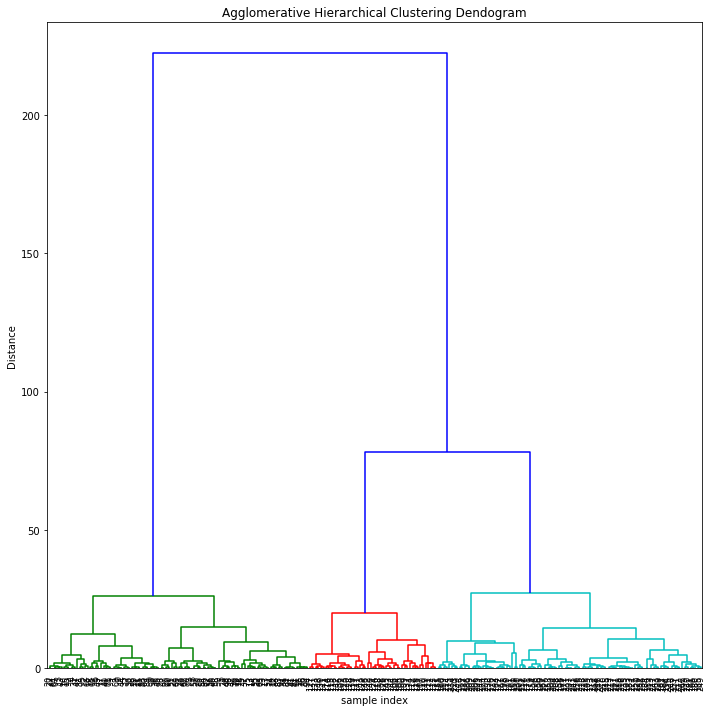

In [137]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

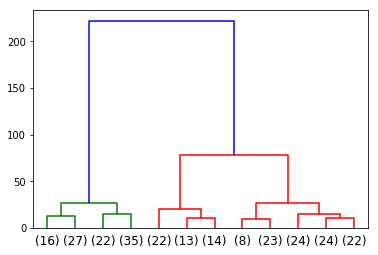

In [138]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [141]:
MaxD = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [139]:
from scipy.cluster.hierarchy import fcluster

In [143]:
f=fcluster(Z,t=MaxD,criterion='distance')
f

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

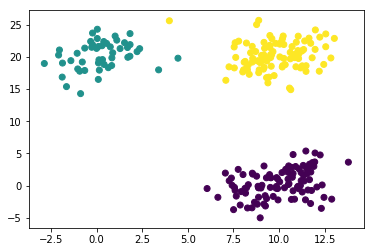

In [145]:
plt.scatter(df_7[0],df_7[1],c=f)